<a href="https://colab.research.google.com/github/tanpeep/SejahteraML/blob/main/Model_BPNT_BST_SEMBAKO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Library Here

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Data Preprocessing

**Dataset Description**

Feature:
*   pekerjaan: Pekerjaan Kepala Keluarga
*   status_pekerjaan: Status Pekerjaan Kepala Keluarga
*   pendidikan: Pendidikan Kepala Keluarga
*   status_kawin: Status Kawin Kepala Keluarga
*   rumah: Kepemilikan Rumah
*   simpanan: Memiliki simpanan uang/perhiasan/ternak/dll.
*   jenis_atap
*   kualitas_atap
*   jenis_dinding
*   kualitas_dinding
*   jenis_lantai
*   kualitas_lantai
*   sumber_penerangan
*   daya_listrik: daya listrik terpasang pada tempat tinggal, 1: > 900 watt, 0: =< 900 watt
*   bahan_bakar_masak
*   air_minum
*   fasilitas_bab
*   stunting

Label:
*   bpnt: penerima bantuan pangan non tunai
*   bpum: penerima bantuan produktif usaha mikro
*   bst: penerima bantuan sosial tunai
*   pkh: penerima program keluarga harapan
*   sembako: bantuan sembako
*   prakerja: penerima prakerja
*   kur: bantuan kredit usaha rakyat





## Useful function

In [ ]:
# feature is in a list format
def one_hot_encode(df, feature):
  one_hot = pd.get_dummies(df, columns = feature)
  df = df.drop(feature, axis = 1)
  df = df.join(one_hot)
  return df

In [ ]:
def label_encode(df, features):
  for feature in features:
    label_encoder = LabelEncoder()
    label_encoder.fit(df[feature])
    df[feature] = label_encoder.transform(df[feature])
  return df

## Open and clean data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/hasil2.csv')

df.head(10)

,pekerjaan,status_pekerjaan,pendidikan,status_kawin,rumah,simpanan,jenis_atap,kualitas_atap,jenis_dinding,kualitas_dinding,...,air_minum,fasilitas_bab,stunting,bpnt,bpum,bst,pkh,sembako,prakerja,kur
0,petani,pekerja_bebas,tdk_tamat_sd,kawin,pribadi,ya,beton,NaN,tembok,NaN,...,air_kemasan,pribadi,bukan_target,tidak,ya,tidak,tidak,tidak,tidak,tidak
1,nelayan,usaha_sendiri,tamat_sltp,kawin,pribadi,NaN,seng,rendah,tembok,rendah,...,air_kemasan,pribadi,tidak_beresiko,ya,tidak,tidak,tidak,tidak,tidak,tidak
2,pekerja_lepas,usaha_sendiri,tamat_slta,kawin,pribadi,NaN,seng,tinggi,tembok,tinggi,...,air_kemasan,pribadi,tidak_beresiko,ya,tidak,ya,ya,ya,tidak,tidak
3,tidak_bekerja,tidak_bekerja,tamat_sd,cerai_mati,menumpang,ya,seng,rendah,tembok,rendah,...,air_kemasan,pribadi,bukan_target,ya,tidak,ya,tidak,ya,tidak,tidak
4,pekerja_lepas,usaha_sendiri,tamat_sd,cerai_mati,menumpang,NaN,seng,rendah,tembok,rendah,...,air_kemasan,pribadi,bukan_target,tidak,tidak,tidak,tidak,tidak,tidak,tidak
5,pekerja_lepas,usaha_sendiri,tamat_slta,cerai_hidup,pribadi,NaN,seng,tinggi,tembok,tinggi,...,air_kemasan,pribadi,bukan_target,ya,tidak,ya,ya,ya,tidak,ya
6,petani,usaha_sendiri,tamat_sd,kawin,pribadi,NaN,seng,rendah,tembok,rendah,...,air_kemasan,pribadi,beresiko,ya,tidak,ya,ya,ya,tidak,tidak
7,petani,usaha_sendiri,tdk_tamat_sd,kawin,pribadi,NaN,seng,tinggi,tembok,tinggi,...,air_kemasan,pribadi,tidak_beresiko,tidak,tidak,tidak,tidak,tidak,tidak,tidak
8,pegawai_swasta,buruh_karyawan_pegawai,tamat_slta,kawin,menumpang,NaN,seng,rendah,kayu,rendah,...,air_kemasan,pribadi,beresiko,tidak,tidak,tidak,tidak,tidak,tidak,tidak
9,pegawai_swasta,buruh_karyawan_pegawai,tamat_slta,kawin,pribadi,NaN,seng,tinggi,tembok,tinggi,...,air_kemasan,pribadi,tidak_beresiko,tidak,tidak,tidak,tidak,tidak,tidak,tidak


In [ ]:
df['simpanan'] = df['simpanan'].fillna('tidak')
df

,pekerjaan,status_pekerjaan,pendidikan,status_kawin,rumah,simpanan,jenis_atap,kualitas_atap,jenis_dinding,kualitas_dinding,...,air_minum,fasilitas_bab,stunting,bpnt,bpum,bst,pkh,sembako,prakerja,kur
0,petani,pekerja_bebas,tdk_tamat_sd,kawin,pribadi,ya,beton,NaN,tembok,NaN,...,air_kemasan,pribadi,bukan_target,tidak,ya,tidak,tidak,tidak,tidak,tidak
1,nelayan,usaha_sendiri,tamat_sltp,kawin,pribadi,tidak,seng,rendah,tembok,rendah,...,air_kemasan,pribadi,tidak_beresiko,ya,tidak,tidak,tidak,tidak,tidak,tidak
2,pekerja_lepas,usaha_sendiri,tamat_slta,kawin,pribadi,tidak,seng,tinggi,tembok,tinggi,...,air_kemasan,pribadi,tidak_beresiko,ya,tidak,ya,ya,ya,tidak,tidak
3,tidak_bekerja,tidak_bekerja,tamat_sd,cerai_mati,menumpang,ya,seng,rendah,tembok,rendah,...,air_kemasan,pribadi,bukan_target,ya,tidak,ya,tidak,ya,tidak,tidak
4,pekerja_lepas,usaha_sendiri,tamat_sd,cerai_mati,menumpang,tidak,seng,rendah,tembok,rendah,...,air_kemasan,pribadi,bukan_target,tidak,tidak,tidak,tidak,tidak,tidak,tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4555,nelayan,usaha_sendiri,tamat_sltp,kawin,pribadi,tidak,seng,tinggi,tembok,tinggi,...,air_kemasan,pribadi,tidak_beresiko,ya,tidak,ya,ya,ya,tidak,ya
4556,pekerja_lepas,pekerja_bebas,tamat_slta,kawin,sewa,tidak,seng,tinggi,kayu,tinggi,...,air_kemasan,pribadi,beresiko,tidak,tidak,ya,tidak,tidak,tidak,tidak
4557,petani,usaha_sendiri,tamat_sd,kawin,pribadi,tidak,seng,tinggi,tembok,tinggi,...,air_kemasan,pribadi,bukan_target,ya,tidak,ya,ya,ya,tidak,tidak
4558,nelayan,usaha_sendiri,tamat_sd,kawin,pribadi,tidak,seng,tinggi,tembok,tinggi,...,air_kemasan,pribadi,beresiko,ya,tidak,ya,ya,ya,tidak,tidak


In [ ]:
df['daya_listrik'] = df['daya_listrik'].fillna('tidak')
df

,pekerjaan,status_pekerjaan,pendidikan,status_kawin,rumah,simpanan,jenis_atap,kualitas_atap,jenis_dinding,kualitas_dinding,...,air_minum,fasilitas_bab,stunting,bpnt,bpum,bst,pkh,sembako,prakerja,kur
0,petani,pekerja_bebas,tdk_tamat_sd,kawin,pribadi,ya,beton,NaN,tembok,NaN,...,air_kemasan,pribadi,bukan_target,tidak,ya,tidak,tidak,tidak,tidak,tidak
1,nelayan,usaha_sendiri,tamat_sltp,kawin,pribadi,tidak,seng,rendah,tembok,rendah,...,air_kemasan,pribadi,tidak_beresiko,ya,tidak,tidak,tidak,tidak,tidak,tidak
2,pekerja_lepas,usaha_sendiri,tamat_slta,kawin,pribadi,tidak,seng,tinggi,tembok,tinggi,...,air_kemasan,pribadi,tidak_beresiko,ya,tidak,ya,ya,ya,tidak,tidak
3,tidak_bekerja,tidak_bekerja,tamat_sd,cerai_mati,menumpang,ya,seng,rendah,tembok,rendah,...,air_kemasan,pribadi,bukan_target,ya,tidak,ya,tidak,ya,tidak,tidak
4,pekerja_lepas,usaha_sendiri,tamat_sd,cerai_mati,menumpang,tidak,seng,rendah,tembok,rendah,...,air_kemasan,pribadi,bukan_target,tidak,tidak,tidak,tidak,tidak,tidak,tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4555,nelayan,usaha_sendiri,tamat_sltp,kawin,pribadi,tidak,seng,tinggi,tembok,tinggi,...,air_kemasan,pribadi,tidak_beresiko,ya,tidak,ya,ya,ya,tidak,ya
4556,pekerja_lepas,pekerja_bebas,tamat_slta,kawin,sewa,tidak,seng,tinggi,kayu,tinggi,...,air_kemasan,pribadi,beresiko,tidak,tidak,ya,tidak,tidak,tidak,tidak
4557,petani,usaha_sendiri,tamat_sd,kawin,pribadi,tidak,seng,tinggi,tembok,tinggi,...,air_kemasan,pribadi,bukan_target,ya,tidak,ya,ya,ya,tidak,tidak
4558,nelayan,usaha_sendiri,tamat_sd,kawin,pribadi,tidak,seng,tinggi,tembok,tinggi,...,air_kemasan,pribadi,beresiko,ya,tidak,ya,ya,ya,tidak,tidak


# Model BPNT

In [ ]:
df_bpnt = df[['bpnt', 'pekerjaan', 'status_pekerjaan', 'pendidikan', 'stunting']]
df_bpnt

,bpnt,pekerjaan,status_pekerjaan,pendidikan,stunting
0,tidak,petani,pekerja_bebas,tdk_tamat_sd,bukan_target
1,ya,nelayan,usaha_sendiri,tamat_sltp,tidak_beresiko
2,ya,pekerja_lepas,usaha_sendiri,tamat_slta,tidak_beresiko
3,ya,tidak_bekerja,tidak_bekerja,tamat_sd,bukan_target
4,tidak,pekerja_lepas,usaha_sendiri,tamat_sd,bukan_target
...,...,...,...,...,...
4555,ya,nelayan,usaha_sendiri,tamat_sltp,tidak_beresiko
4556,tidak,pekerja_lepas,pekerja_bebas,tamat_slta,beresiko
4557,ya,petani,usaha_sendiri,tamat_sd,bukan_target
4558,ya,nelayan,usaha_sendiri,tamat_sd,beresiko


In [ ]:
df_bpnt = label_encode(df_bpnt, ['bpnt'])
df_bpnt

<ipython-input-4-e488aed8a847>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = label_encoder.transform(df[feature])


,bpnt,pekerjaan,status_pekerjaan,pendidikan,stunting
0,0,petani,pekerja_bebas,tdk_tamat_sd,bukan_target
1,1,nelayan,usaha_sendiri,tamat_sltp,tidak_beresiko
2,1,pekerja_lepas,usaha_sendiri,tamat_slta,tidak_beresiko
3,1,tidak_bekerja,tidak_bekerja,tamat_sd,bukan_target
4,0,pekerja_lepas,usaha_sendiri,tamat_sd,bukan_target
...,...,...,...,...,...
4555,1,nelayan,usaha_sendiri,tamat_sltp,tidak_beresiko
4556,0,pekerja_lepas,pekerja_bebas,tamat_slta,beresiko
4557,1,petani,usaha_sendiri,tamat_sd,bukan_target
4558,1,nelayan,usaha_sendiri,tamat_sd,beresiko


In [ ]:
df_bpnt_feature = df_bpnt[['pekerjaan', 'status_pekerjaan', 'pendidikan', 'stunting']]
df_bpnt_feature = one_hot_encode(df_bpnt_feature, df_bpnt_feature.columns)

In [ ]:
df_bpnt = df_bpnt.drop(['pekerjaan', 'status_pekerjaan', 'pendidikan', 'stunting'], axis='columns')
df_bpnt

,bpnt
0,0
1,1
2,1
3,1
4,0
...,...
4555,1
4556,0
4557,1
4558,1


In [ ]:
df_bpnt = df_bpnt.join(df_bpnt_feature)
df_bpnt

,bpnt,pekerjaan_asn,pekerjaan_nelayan,pekerjaan_pedagang,pekerjaan_pegawai_swasta,pekerjaan_pejabat_negara,pekerjaan_pekerja_lepas,pekerjaan_pensiunan,pekerjaan_petani,pekerjaan_tidak_bekerja,...,pendidikan_masih_sltp,pendidikan_tamat_pt,pendidikan_tamat_sd,pendidikan_tamat_slta,pendidikan_tamat_sltp,pendidikan_tdk_tamat_sd,pendidikan_tidak_sekolah,stunting_beresiko,stunting_bukan_target,stunting_tidak_beresiko
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4555,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4556,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4557,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4558,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
y = df_bpnt['bpnt']
X = df_bpnt.drop('bpnt', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
114/114 [==============================] - 1s 3ms/step - loss: 0.6605 - accuracy: 0.5998
Epoch 2/50
114/114 [==============================] - 0s 4ms/step - loss: 0.6480 - accuracy: 0.6069
Epoch 3/50
114/114 [==============================] - 0s 4ms/step - loss: 0.6446 - accuracy: 0.6179
Epoch 4/50
114/114 [==============================] - 1s 6ms/step - loss: 0.6424 - accuracy: 0.6214
Epoch 5/50
114/114 [==============================] - 0s 4ms/step - loss: 0.6400 - accuracy: 0.6206
Epoch 6/50
114/114 [==============================] - 0s 4ms/step - loss: 0.6385 - accuracy: 0.6192
Epoch 7/50
114/114 [==============================] - 0s 3ms/step - loss: 0.6370 - accuracy: 0.6297
Epoch 8/50
114/114 [==============================] - 0s 3ms/step - loss: 0.6349 - accuracy: 0.6297
Epoch 9/50
114/114 [==============================] - 0s 3ms/step - loss: 0.6331 - accuracy: 0.6297
Epoch 10/50
114/114 [==============================] - 0s 3ms/step - loss: 0.6329 - accuracy: 0.6313

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5).astype(int)
y_pred

29/29 [==============================] - 0s 2ms/step


array([[1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
    

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Akurasi:", accuracy)
print("Laporan Klasifikasi:\n", report)

Akurasi: 0.6107456140350878
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.64      0.64      0.64       495
           1       0.57      0.57      0.57       417

    accuracy                           0.61       912
   macro avg       0.61      0.61      0.61       912
weighted avg       0.61      0.61      0.61       912



In [ ]:
!mkdir -p saved_model
model.save('saved_model/model_bpnt')

In [ ]:
# model.save('model_bpnt.h5')

# Model BST

In [ ]:
df_bst = df[['bst', 'pekerjaan', 'status_pekerjaan', 'rumah', 'jenis_lantai', 'jenis_dinding']]
df_bst

,bst,pekerjaan,status_pekerjaan,rumah,jenis_lantai,jenis_dinding
0,tidak,petani,pekerja_bebas,pribadi,semen,tembok
1,tidak,nelayan,usaha_sendiri,pribadi,semen,tembok
2,ya,pekerja_lepas,usaha_sendiri,pribadi,semen,tembok
3,ya,tidak_bekerja,tidak_bekerja,menumpang,semen,tembok
4,tidak,pekerja_lepas,usaha_sendiri,menumpang,semen,tembok
...,...,...,...,...,...,...
4555,ya,nelayan,usaha_sendiri,pribadi,semen,tembok
4556,ya,pekerja_lepas,pekerja_bebas,sewa,semen,kayu
4557,ya,petani,usaha_sendiri,pribadi,semen,tembok
4558,ya,nelayan,usaha_sendiri,pribadi,semen,tembok


In [ ]:
df_bst = label_encode(df_bst, ['bst'])
df_bst

<ipython-input-4-e488aed8a847>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = label_encoder.transform(df[feature])


,bst,pekerjaan,status_pekerjaan,rumah,jenis_lantai,jenis_dinding
0,0,petani,pekerja_bebas,pribadi,semen,tembok
1,0,nelayan,usaha_sendiri,pribadi,semen,tembok
2,1,pekerja_lepas,usaha_sendiri,pribadi,semen,tembok
3,1,tidak_bekerja,tidak_bekerja,menumpang,semen,tembok
4,0,pekerja_lepas,usaha_sendiri,menumpang,semen,tembok
...,...,...,...,...,...,...
4555,1,nelayan,usaha_sendiri,pribadi,semen,tembok
4556,1,pekerja_lepas,pekerja_bebas,sewa,semen,kayu
4557,1,petani,usaha_sendiri,pribadi,semen,tembok
4558,1,nelayan,usaha_sendiri,pribadi,semen,tembok


In [ ]:
df_bst_feature = df_bst[['pekerjaan', 'status_pekerjaan', 'rumah', 'jenis_lantai', 'jenis_dinding']]
df_bst_feature = one_hot_encode(df_bst_feature, df_bst_feature.columns)

In [ ]:
df_bst = df_bst.drop(['pekerjaan', 'status_pekerjaan', 'rumah', 'jenis_lantai', 'jenis_dinding'], axis='columns')
df_bst

,bst
0,0
1,0
2,1
3,1
4,0
...,...
4555,1
4556,1
4557,1
4558,1


In [ ]:
df_bst = df_bst.join(df_bst_feature)
df_bst

,bst,pekerjaan_asn,pekerjaan_nelayan,pekerjaan_pedagang,pekerjaan_pegawai_swasta,pekerjaan_pejabat_negara,pekerjaan_pekerja_lepas,pekerjaan_pensiunan,pekerjaan_petani,pekerjaan_tidak_bekerja,...,jenis_lantai_kayu,jenis_lantai_lainnya,jenis_lantai_semen,jenis_lantai_tanah,jenis_lantai_ubin,jenis_dinding_bambu,jenis_dinding_kayu,jenis_dinding_lainnya,jenis_dinding_seng,jenis_dinding_tembok
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4555,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4556,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4557,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4558,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
y = df_bst['bst']
X = df_bst.drop('bst', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model2.fit(X_train, y_train, epochs=100)

Epoch 1/100
114/114 [==============================] - 1s 3ms/step - loss: 0.6380 - accuracy: 0.6105
Epoch 2/100
114/114 [==============================] - 0s 3ms/step - loss: 0.6285 - accuracy: 0.6343
Epoch 3/100
114/114 [==============================] - 0s 3ms/step - loss: 0.6251 - accuracy: 0.6373
Epoch 4/100
114/114 [==============================] - 0s 3ms/step - loss: 0.6212 - accuracy: 0.6343
Epoch 5/100
114/114 [==============================] - 0s 3ms/step - loss: 0.6185 - accuracy: 0.6412
Epoch 6/100
114/114 [==============================] - 0s 3ms/step - loss: 0.6159 - accuracy: 0.6324
Epoch 7/100
114/114 [==============================] - 0s 3ms/step - loss: 0.6153 - accuracy: 0.6373
Epoch 8/100
114/114 [==============================] - 0s 3ms/step - loss: 0.6130 - accuracy: 0.6428
Epoch 9/100
114/114 [==============================] - 0s 3ms/step - loss: 0.6128 - accuracy: 0.6414
Epoch 10/100
114/114 [==============================] - 0s 3ms/step - loss: 0.6110 - accura

In [ ]:
y_pred = model2.predict(X_test)
y_pred = (y_pred>0.5).astype(int)
y_pred

29/29 [==============================] - 0s 2ms/step


array([[1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
    

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Akurasi:", accuracy)
print("Laporan Klasifikasi:\n", report)

Akurasi: 0.5953947368421053
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.64      0.77      0.70       550
           1       0.49      0.34      0.40       362

    accuracy                           0.60       912
   macro avg       0.56      0.55      0.55       912
weighted avg       0.58      0.60      0.58       912



In [ ]:
!mkdir -p saved_model
model.save('saved_model/model_bst')

In [ ]:
# model2.save('model_bst.h5')

# Model Sembako

In [ ]:
df_sembako = df[['sembako', 'pekerjaan']]
df_sembako

,sembako,pekerjaan
0,tidak,petani
1,tidak,nelayan
2,ya,pekerja_lepas
3,ya,tidak_bekerja
4,tidak,pekerja_lepas
...,...,...
4555,ya,nelayan
4556,tidak,pekerja_lepas
4557,ya,petani
4558,ya,nelayan


In [ ]:
df_sembako = label_encode(df_sembako, ['sembako'])
df_sembako

<ipython-input-4-e488aed8a847>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = label_encoder.transform(df[feature])


,sembako,pekerjaan
0,0,petani
1,0,nelayan
2,1,pekerja_lepas
3,1,tidak_bekerja
4,0,pekerja_lepas
...,...,...
4555,1,nelayan
4556,0,pekerja_lepas
4557,1,petani
4558,1,nelayan


In [ ]:
df_sembako_feature = df_sembako[['pekerjaan']]
df_sembako_feature = one_hot_encode(df_sembako_feature, df_sembako_feature.columns)

In [ ]:
df_sembako = df_sembako.drop(['pekerjaan'], axis='columns')
df_sembako

,sembako
0,0
1,0
2,1
3,1
4,0
...,...
4555,1
4556,0
4557,1
4558,1


In [ ]:
df_sembako = df_sembako.join(df_sembako_feature)
df_sembako

,sembako,pekerjaan_asn,pekerjaan_nelayan,pekerjaan_pedagang,pekerjaan_pegawai_swasta,pekerjaan_pejabat_negara,pekerjaan_pekerja_lepas,pekerjaan_pensiunan,pekerjaan_petani,pekerjaan_tidak_bekerja,pekerjaan_wiraswasta
0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4555,1,0,1,0,0,0,0,0,0,0,0
4556,0,0,0,0,0,0,1,0,0,0,0
4557,1,0,0,0,0,0,0,0,1,0,0
4558,1,0,1,0,0,0,0,0,0,0,0


In [ ]:
y = df_sembako['sembako']
X = df_sembako.drop('sembako', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model3.fit(X_train, y_train, epochs=50)

Epoch 1/50
114/114 [==============================] - 1s 4ms/step - loss: 0.5914 - accuracy: 0.6979
Epoch 2/50
114/114 [==============================] - 0s 4ms/step - loss: 0.5842 - accuracy: 0.6941
Epoch 3/50
114/114 [==============================] - 0s 4ms/step - loss: 0.5807 - accuracy: 0.7001
Epoch 4/50
114/114 [==============================] - 0s 3ms/step - loss: 0.5815 - accuracy: 0.7020
Epoch 5/50
114/114 [==============================] - 0s 4ms/step - loss: 0.5819 - accuracy: 0.7007
Epoch 6/50
114/114 [==============================] - 1s 5ms/step - loss: 0.5807 - accuracy: 0.6974
Epoch 7/50
114/114 [==============================] - 1s 7ms/step - loss: 0.5804 - accuracy: 0.7007
Epoch 8/50
114/114 [==============================] - 1s 7ms/step - loss: 0.5809 - accuracy: 0.7007
Epoch 9/50
114/114 [==============================] - 1s 6ms/step - loss: 0.5804 - accuracy: 0.7007
Epoch 10/50
114/114 [==============================] - 1s 7ms/step - loss: 0.5808 - accuracy: 0.7007

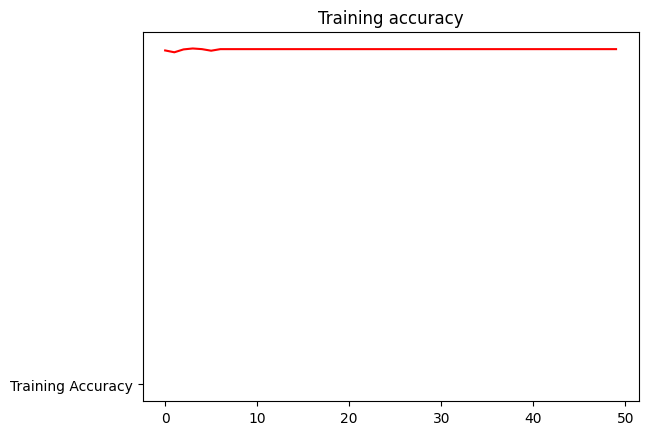

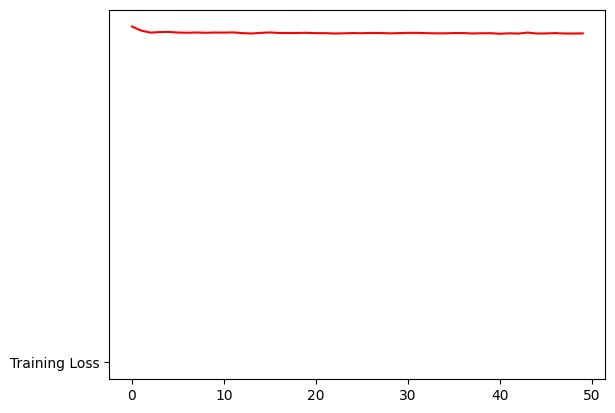

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
loss=history.history['loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.title('Training accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.show()

In [ ]:
y_pred = model3.predict(X_test)
y_pred = (y_pred>0.5).astype(int)
y_pred

29/29 [==============================] - 0s 2ms/step


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Akurasi:", accuracy)
print("Laporan Klasifikasi:\n", report)

Akurasi: 0.7214912280701754
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.72      1.00      0.84       658
           1       0.00      0.00      0.00       254

    accuracy                           0.72       912
   macro avg       0.36      0.50      0.42       912
weighted avg       0.52      0.72      0.60       912



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
!mkdir -p saved_model
model.save('saved_model/model_sembako')

In [ ]:
# model3.save('model_sembako.h5')

In [ ]:
# from google.colab import files
# files.download('model_bpnt.h5')
# files.download('model_bst.h5')
# files.download('model_sembako.h5')